<a href="https://colab.research.google.com/github/SDRChumpitaz/predicciones-ventas-comida/blob/main/predicciones_venta_comida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de datos

## Lectura de datos

In [1]:
import pandas as pd

In [2]:
file = "/content/drive/MyDrive/Bootcamp - Data Science /Proyecto /sales_predictions.csv"
df = pd.read_csv(file)

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Podemos notar que hay datos faltantes y nulos en: "Outlet_Size", "Item_Weight"

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


## Filtrado de datos

### Filtrado ITEMS

In [6]:
df[["Item_Identifier","Item_Weight"]].sort_values(by ="Item_Identifier")

,Item_Identifier,Item_Weight
8043,DRA12,11.60
118,DRA12,11.60
1693,DRA12,11.60
1197,DRA12,11.60
1245,DRA12,11.60
...,...,...
7926,NCZ54,14.65
214,NCZ54,14.65
1896,NCZ54,NaN
7166,NCZ54,NaN


Todos los item con el mismo identificador deben pesar lo mismo.

In [7]:
peso_na = df[df["Item_Weight"].isna()]
peso_na

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Buscamos un metodo que coloque el peso por identificación.

In [8]:
grupo_items = df.groupby(["Item_Identifier"])[["Item_Weight"]].min().reset_index()
grupo_items

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


In [9]:
df = pd.merge(df, grupo_items, on='Item_Identifier', how='left')

In [10]:
df.head()

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


Por defecto, me crea otra columna. Así que, revisaré los datos primero y después desecho la columna original.

In [11]:
df[df["Item_Weight_y"].isna()]

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,NaN
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,NaN
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,NaN
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,NaN


In [12]:
df[df["Item_Weight_x"].isna()]

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,19.000
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,8.260
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,8.315
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,15.500
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,14.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490,5.000
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150,17.250
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120,19.100
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656,12.150


Como son códigos únicos, los desecho.

In [13]:
df["Item_Weight_x"] = df["Item_Weight_y"]

In [14]:
df.drop(927, inplace=True)
df.drop(1922, inplace=True)
df.drop(4187, inplace=True)
df.drop(5022, inplace=True)

Verificamos que se cambió, ahora a dropear la columna adicionales.

In [15]:
df.drop(columns=["Item_Weight_y"], inplace=True)

Renombramos la columna

In [16]:
df.rename(columns={"Item_Weight_x": "Item_Weight"}, inplace=True)

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
df[df["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Filtrado TIENDAS

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [20]:
df_outles_1 = df[["Outlet_Size","Outlet_Identifier"]]
grupo_tienda = df_outles_1.groupby(["Outlet_Identifier"])[["Outlet_Size"]].min().reset_index()
grupo_tienda

,Outlet_Identifier,Outlet_Size
0,OUT010,NaN
1,OUT013,High
2,OUT017,NaN
3,OUT018,Medium
4,OUT019,Small
5,OUT027,Medium
6,OUT035,Small
7,OUT045,NaN
8,OUT046,Small
9,OUT049,Medium


Buscamos una relación

In [21]:
df_outles_2 = df.groupby(["Outlet_Type","Outlet_Location_Type","Outlet_Size"])[["Item_Outlet_Sales"]].min().reset_index()
df_outles_2

,Outlet_Type,Outlet_Location_Type,Outlet_Size,Item_Outlet_Sales
0,Grocery Store,Tier 1,Small,33.9558
1,Supermarket Type1,Tier 1,Medium,111.8544
2,Supermarket Type1,Tier 1,Small,101.8674
3,Supermarket Type1,Tier 2,Small,113.8518
4,Supermarket Type1,Tier 3,High,73.2380
5,Supermarket Type2,Tier 3,Medium,69.2432
6,Supermarket Type3,Tier 3,Medium,241.6854


Notamos que en "Outlet_Type":


1.   Grocery Store de Tier 1 solo puede ser "Small"
2.   Supermarket Type1 de Tier 2 solo puede ser "Small"
3.   Supermarket Type1 de Tier 3 solo puede ser "High"
4.   Supermarket Type2 de Tier 3 solo puede ser "Medium"
5.   Supermarket Type3 de Tier 3 solo puede ser "Medium"


In [22]:
for index, row in df.iterrows():
  if (row["Outlet_Type"] == "Grocery Store")& (row["Outlet_Location_Type"] == "Tier 1") :
    df.at[index, "Outlet_Size"] = "Small"
  elif (row["Outlet_Type"] == "Supermarket Type1") & (row["Outlet_Location_Type"] == "Tier 2") :
    df.at[index, "Outlet_Size"] = "Small"
  elif (row["Outlet_Type"] == "Supermarket Type1") & (row["Outlet_Location_Type"] == "Tier 3") :
    df.at[index, "Outlet_Size"] = "High"
  elif (row["Outlet_Type"] == "Supermarket Type2") & (row["Outlet_Location_Type"] == "Tier 3") :
    df.at[index, "Outlet_Size"] = "Medium"
  elif (row["Outlet_Type"] == "Supermarket Type3") & (row["Outlet_Location_Type"] == "Tier 3") :
    df.at[index, "Outlet_Size"] = "Medium"
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                7964 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [24]:
df["Outlet_Size"].isna().sum()

555

Notamos que quedan 555 datos que no hay forma de rellenar. Por ese motivo, hago un drop.

In [25]:
valores_no_accesibles= df["Outlet_Size"].isna()
df = df[~valores_no_accesibles]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7964 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7964 non-null   object 
 1   Item_Weight                7964 non-null   float64
 2   Item_Fat_Content           7964 non-null   object 
 3   Item_Visibility            7964 non-null   float64
 4   Item_Type                  7964 non-null   object 
 5   Item_MRP                   7964 non-null   float64
 6   Outlet_Identifier          7964 non-null   object 
 7   Outlet_Establishment_Year  7964 non-null   int64  
 8   Outlet_Size                7964 non-null   object 
 9   Outlet_Location_Type       7964 non-null   object 
 10  Outlet_Type                7964 non-null   object 
 11  Item_Outlet_Sales          7964 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 808.8+ KB


### Adicional

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7964.0,12.872791,4.646894,4.5550,8.775000,12.650000,16.850000,21.350000
Item_Visibility,7964.0,0.063649,0.048911,0.0000,0.026513,0.052321,0.091592,0.328391
Item_MRP,7964.0,141.026217,62.291819,31.2900,93.835050,142.931200,185.708200,266.888400
Outlet_Establishment_Year,7964.0,1997.826595,8.655732,1985.0000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,7964.0,2309.543827,1690.303375,33.9558,1012.016000,1936.479300,3200.999950,13086.964800


¿Item_Visibility	= 0?

In [28]:
df[df["Item_Visibility"] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
33,FDO23,17.850,Low Fat,0.0,Breads,93.1436,OUT045,2002,Small,Tier 2,Supermarket Type1,2174.5028
...,...,...,...,...,...,...,...,...,...,...,...,...
8467,FDV31,9.800,LF,0.0,Fruits and Vegetables,175.2370,OUT049,1999,Medium,Tier 1,Supermarket Type1,3881.6140
8480,FDQ58,7.315,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,Small,Tier 2,Supermarket Type1,1637.8680


Además, podemos darnos cuenta que tiene ventas.No podemos considerar datos con visibilidad 0 pero con ventas

In [29]:
valores_raros= df["Item_Visibility"] == 0
df = df[~valores_raros]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7467 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7467 non-null   object 
 1   Item_Weight                7467 non-null   float64
 2   Item_Fat_Content           7467 non-null   object 
 3   Item_Visibility            7467 non-null   float64
 4   Item_Type                  7467 non-null   object 
 5   Item_MRP                   7467 non-null   float64
 6   Outlet_Identifier          7467 non-null   object 
 7   Outlet_Establishment_Year  7467 non-null   int64  
 8   Outlet_Size                7467 non-null   object 
 9   Outlet_Location_Type       7467 non-null   object 
 10  Outlet_Type                7467 non-null   object 
 11  Item_Outlet_Sales          7467 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 758.4+ KB


In [35]:
df["Item_Fat_Content"].value_counts()

Low Fat    4478
Regular    2526
LF          262
reg         104
low fat      97
Name: Item_Fat_Content, dtype: int64

Nos damos cuenta que existe Lf, low fat que hace referencia a un valor ya presente "Low Fat" Y reg que hace referencia a "Regular"

In [39]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF":"Low Fat"})
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"low fat":"Low Fat"})
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"reg":"Regular"})

In [41]:
df["Item_Fat_Content"].value_counts()

Low Fat    4837
Regular    2630
Name: Item_Fat_Content, dtype: int64

Verificando columnas

In [47]:
df["Item_Identifier"].value_counts()

NCQ06    9
FDG33    9
FDX04    9
FDX20    9
NCL31    9
        ..
FDZ50    1
FDU35    1
FDO33    1
DRE01    1
FDP15    1
Name: Item_Identifier, Length: 1555, dtype: int64

In [49]:
df["Item_Weight"].describe()

count    7467.000000
mean       12.907121
std         4.647124
min         4.555000
25%         8.850000
50%        12.650000
75%        17.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [52]:
df["Item_Visibility"].describe()

count    7467.000000
mean        0.067886
std         0.047580
min         0.003575
25%         0.030754
50%         0.056104
75%         0.094696
max         0.328391
Name: Item_Visibility, dtype: float64

In [53]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1075
Snack Foods              1064
Household                 794
Frozen Foods              753
Dairy                     600
Canned                    582
Baking Goods              560
Health and Hygiene        453
Soft Drinks               385
Meat                      373
Breads                    218
Hard Drinks               182
Others                    150
Starchy Foods             124
Breakfast                  98
Seafood                    56
Name: Item_Type, dtype: int64

In [55]:
df["Item_MRP"].describe()

count    7467.000000
mean      141.203030
std        62.246802
min        31.290000
25%        94.044900
50%       143.215400
75%       185.826600
max       266.888400
Name: Item_MRP, dtype: float64

In [56]:
df["Outlet_Identifier"].value_counts()

OUT049    877
OUT035    876
OUT013    873
OUT027    872
OUT045    871
OUT017    869
OUT046    869
OUT018    863
OUT019    497
Name: Outlet_Identifier, dtype: int64

In [57]:
df["Outlet_Establishment_Year"].value_counts()

1985    1369
1999     877
2004     876
1987     873
2002     871
2007     869
1997     869
2009     863
Name: Outlet_Establishment_Year, dtype: int64

In [58]:
df["Outlet_Size"].value_counts()

Small     3982
Medium    2612
High       873
Name: Outlet_Size, dtype: int64

In [59]:
df["Outlet_Location_Type"].value_counts()

Tier 2    2616
Tier 3    2608
Tier 1    2243
Name: Outlet_Location_Type, dtype: int64

In [60]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5235
Supermarket Type3     872
Supermarket Type2     863
Grocery Store         497
Name: Outlet_Type, dtype: int64

In [62]:
df["Item_Outlet_Sales"].describe()

count     7467.000000
mean      2308.213755
std       1687.695185
min         33.955800
25%       1012.016000
50%       1940.807000
75%       3199.501900
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## Visualización de Datos

In [33]:
import matplotlib.pyplot as plt

In [94]:
df1 = df.groupby(["Item_Type"])[["Item_Weight"]].mean().reset_index()
df1

,Item_Type,Item_Weight
0,Baking Goods,12.349562
1,Breads,11.168394
2,Breakfast,12.822857
3,Canned,12.374287
4,Dairy,13.423500
5,Frozen Foods,12.792795
6,Fruits and Vegetables,13.244567
7,Hard Drinks,11.479890
8,Health and Hygiene,13.099713
9,Household,13.643608


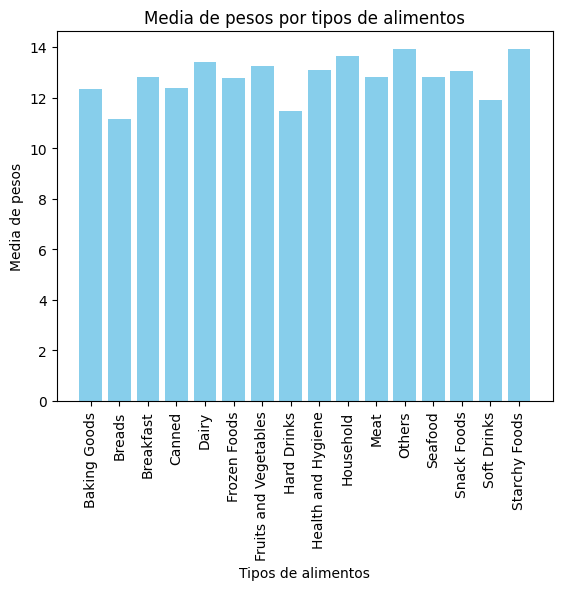

In [97]:
plt.figure(75)
plt.bar(df1["Item_Type"],df1["Item_Weight"],color = "skyblue",width=0.8)
plt.xlabel("Tipos de alimentos")
plt.ylabel("Media de pesos")
plt.title("Media de pesos por tipos de alimentos",fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

In [101]:
df2 = df.groupby(["Outlet_Location_Type"])[["Item_Outlet_Sales"]].mean().reset_index()
df2

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,1883.085138
1,Tier 2,2319.041210
2,Tier 3,2662.983258


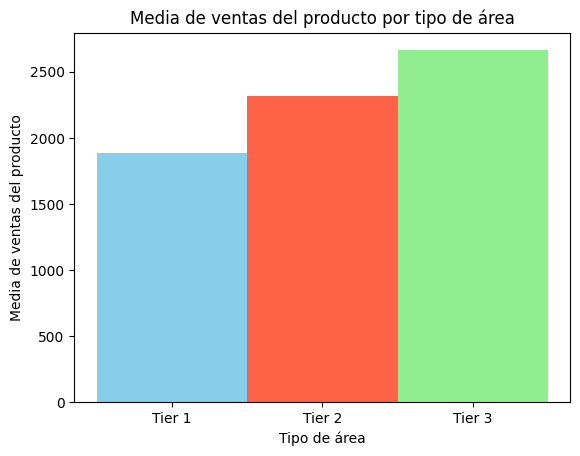

In [109]:
plt.figure(75)
colores = ["skyblue","tomato","lightgreen"]
plt.bar(df2["Outlet_Location_Type"],df2["Item_Outlet_Sales"],color = colores , width=1)
plt.xlabel("Tipo de área")
plt.ylabel("Media de ventas del producto")
plt.title("Media de ventas del producto por tipo de área",fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

In [106]:
df3 = df.groupby(["Outlet_Size"])[["Item_Outlet_Sales"]].mean().reset_index()
df3

,Outlet_Size,Item_Outlet_Sales
0,High,2293.568889
1,Medium,2682.457475
2,Small,2065.938609


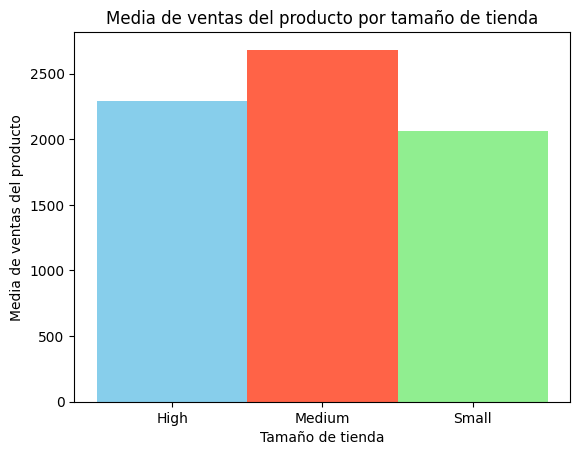

In [108]:
plt.figure(75)
colores = ["skyblue","tomato","lightgreen"]
plt.bar(df3["Outlet_Size"],df3["Item_Outlet_Sales"],color = colores , width=1)
plt.xlabel("Tamaño de tienda")
plt.ylabel("Media de ventas del producto")
plt.title("Media de ventas del producto por tamaño de tienda",fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

In [142]:
df4 = df.groupby(["Outlet_Type","Outlet_Establishment_Year"])[["Item_Outlet_Sales"]].mean().reset_index()
df4

,Outlet_Type,Outlet_Establishment_Year,Item_Outlet_Sales
0,Grocery Store,1985,343.101342
1,Supermarket Type1,1987,2293.568889
2,Supermarket Type1,1997,2289.337594
3,Supermarket Type1,1999,2353.254537
4,Supermarket Type1,2002,2168.291215
5,Supermarket Type1,2004,2443.191102
6,Supermarket Type1,2007,2344.988207
7,Supermarket Type2,2009,1993.344252
8,Supermarket Type3,1985,3695.548860


In [143]:
tienda_tipo1 = df4[df4["Outlet_Type"] == "Supermarket Type1"]
tienda_tipo1

,Outlet_Type,Outlet_Establishment_Year,Item_Outlet_Sales
1,Supermarket Type1,1987,2293.568889
2,Supermarket Type1,1997,2289.337594
3,Supermarket Type1,1999,2353.254537
4,Supermarket Type1,2002,2168.291215
5,Supermarket Type1,2004,2443.191102
6,Supermarket Type1,2007,2344.988207


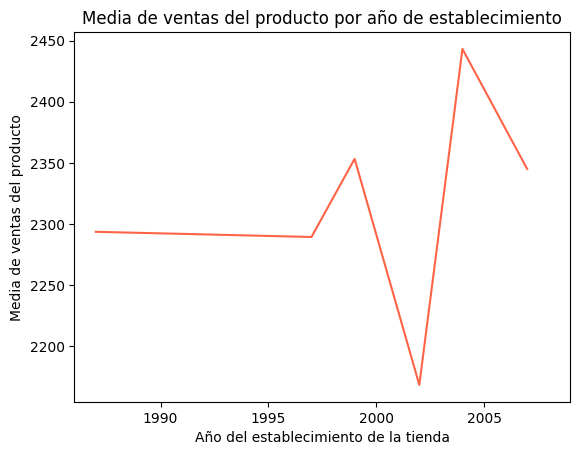

In [158]:
plt.figure(150)
plt.plot(tienda_tipo1["Outlet_Establishment_Year"],tienda_tipo1["Item_Outlet_Sales"],color = "tomato")
plt.xlabel("Año del establecimiento de la tienda")
plt.xlim(left = 1986, right = 2009)
plt.ylabel("Media de ventas del producto")
plt.title("Media de ventas del producto por año de establecimiento",fontsize = 12)
plt.xticks(rotation = 0)
plt.show()